In [1]:
import makesens.tratamiento.tratamiento as mkt
import makesens.visualizacion.visualizacion as mkv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
amb = mkt.loaddata_amb('../Data/DATOSMINUTOS.csv','csv')
eva1 = pd.read_csv('../Data/EVAS_Pilar/Eva1_pilar.csv')
#eva2 = pd.read_csv('../Data/EVAS_Pilar/Eva2_pilar.csv')
#eva3 = pd.read_csv('../Data/EVAS_Pilar/Eva3_pilar.csv')

In [3]:
eva1.index = pd.DatetimeIndex(eva1['Unnamed: 0']) - pd.Timedelta(hours = 5, minutes = 5)
eva1.index = eva1.index.strftime('%Y-%m-%d %H:%M:%S')

def clean_nan(data,var):
    b = np.array(data[var])
    b = np.where(b == '<Samp',np.nan,b)
    data[var] = list(b)
    return data

amb = clean_nan(amb,'R_Solar')
amb.R_Solar = pd.to_numeric(amb.R_Solar)

In [4]:
datastart = '2020-12-15 00:00:00'
dataend = '2020-12-15 23:00:00'

In [5]:
amb,eva1 = mkt.cutdata([amb,eva1],datastart,dataend)
all_data = pd.merge(amb.R_Solar,eva1.irradiance_nan,left_index=True,right_index=True)

In [6]:
for i in range(0,len(all_data.irradiance_nan)):
    if  np.isnan(all_data.irradiance_nan[i]):
        continue
    else:
        if all_data.irradiance_nan[i] <= 924:
            all_data.irradiance_nan[i]  = all_data.irradiance_nan[i] / 46.215
        else:
            all_data.irradiance_nan[i]  = (all_data.irradiance_nan[i] - 228.84) / 46.215 

In [7]:
all_data.R_Solar = mkt.rolling(all_data.R_Solar,5)
all_data.irradiance_nan = mkt.rolling(all_data.irradiance_nan,5)

In [8]:
rmse_i, coef_i, intercept_i, calib_i= mkt.LinearModel([all_data['R_Solar'],all_data['irradiance_nan']],0.5)
print('RMSE_i:',rmse_i, 'COEF_i:',coef_i, 'Intercept_i',intercept_i)

RMSE_i: 63.53408345303062 COEF_i: [1.51522039] Intercept_i 4.386471219797329


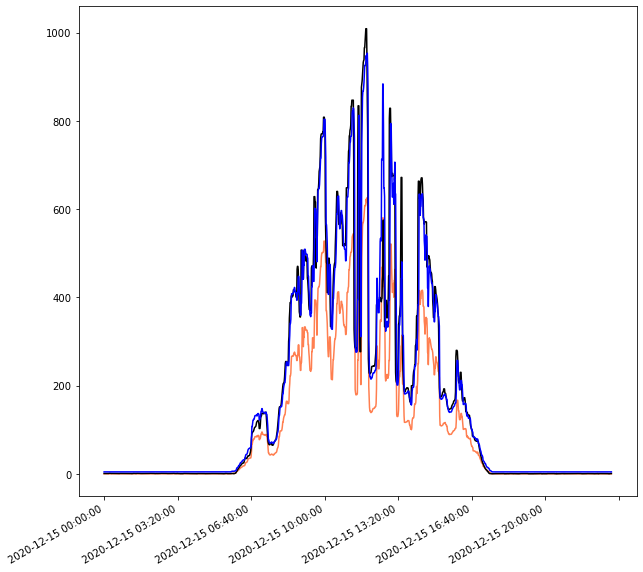

In [9]:
plt.figure(figsize=(10,10))
all_data.irradiance_nan.plot(color = 'coral')
all_data.R_Solar.plot(color = 'k')
calib_i.plot(color = 'b')
plt.gcf().autofmt_xdate()

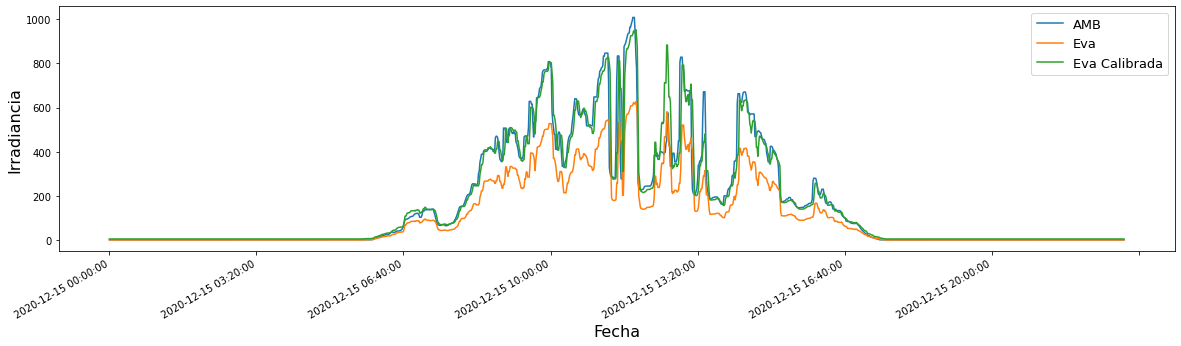

In [10]:
mkv.vizualize([all_data['R_Solar'],all_data['irradiance_nan'],calib_i],['AMB','Eva','Eva Calibrada'],'Fecha','Irradiancia',16,(20,5))